<a href="https://colab.research.google.com/github/Isha055014/CNN----Digit-Recognition----DLM-/blob/main/CNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.5 MB/s eta 0:00:00


In [2]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# **Step 1: Training the CNN on the MNIST Dataset**

This step involves:

- Loading the MNIST dataset – Prepares the images and labels.
- Preprocessing the data – Normalization and reshaping for CNN input.
- Building the CNN model – Defining layers and compiling the model.
- Training the model – Feeding the data into the model and adjusting weights.
- Evaluating performance – Checking test accuracy using a confusion matrix.
- Testing the model performance

## **Step 1.1: Loading and Preprocessing the MNIST Dataset**

Why?

- The MNIST dataset contains grayscale images (28×28 pixels) of digits (0-9).
- CNNs require images in a standard format, so we reshape them to (28,28,1).
- Normalizing the pixel values (0-255 scaled to 0-1) helps CNNs train efficiently.

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize pixel values (convert range from [0, 255] to [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Reshape images for CNN input (28x28 pixels with 1 color channel)
x_train = x_train.reshape(-1, 28, 28, 1)  # (60000, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)    # (10000, 28, 28, 1)


In [6]:
# Print dataset shape
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")

Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


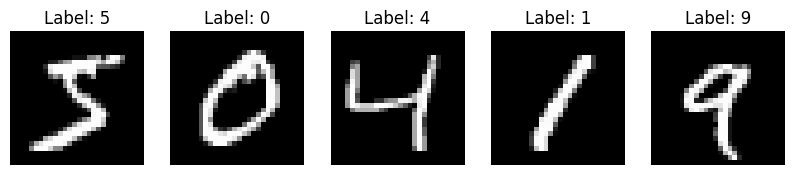

In [7]:
# Display some sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()

## **Step 1.2: Defining and Building the CNN Model**

Why?

A CNN (Convolutional Neural Network) extracts important features from images using:

- Conv2D Layers – Detects edges, curves, and textures.
- MaxPooling2D – Reduces image size while keeping key features.
- Flatten – Converts 2D feature maps into a 1D vector.
- Dense Layers – Fully connected layers that classify the digits.

In [8]:
# Defining the CNN model
ig_14_model = keras.Sequential([
    # First convolutional layer (32 filters, 3x3 kernel)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((3, 3)),  # Reduces size to 14x14 # 2x2

    # Second convolutional layer (64 filters, 3x3 kernel)
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),  # Reduces size to 7x7 # 2x2

    # Flatten the feature maps into a single vector
    layers.Flatten(),

    # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu'),

    # Output layer with 10 neurons (one for each digit 0-9)
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compiling the model
ig_14_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Displaying model architecture
ig_14_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,002 (207.04 KB)

 Trainable params: 53,002 (207.04 KB)

 Non-trainable params: 0 (0.00 B)

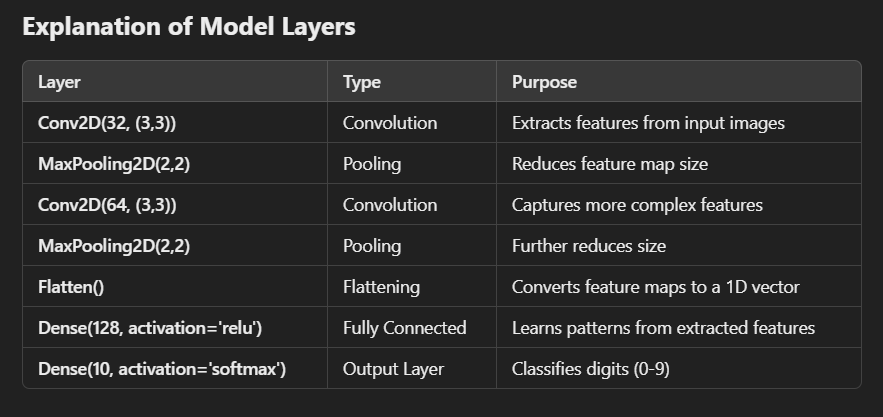

## **Step 1.3: Train the Model**

Why?

- We train the model using 5 epochs (number of times the model sees the entire dataset).
- The Adam optimizer helps the model adjust weights efficiently.
- Sparse categorical crossentropy is used as the loss function for classification.

In [10]:
# Training the model
history = ig_14_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8641 - loss: 0.4486 - val_accuracy: 0.9806 - val_loss: 0.0610
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9820 - loss: 0.0599 - val_accuracy: 0.9838 - val_loss: 0.0486
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9878 - loss: 0.0398 - val_accuracy: 0.9877 - val_loss: 0.0396
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9901 - loss: 0.0295 - val_accuracy: 0.9869 - val_loss: 0.0429
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9925 - loss: 0.0237 - val_accuracy: 0.9889 - val_loss: 0.0379


## **Step 1.4: Evaluate Model Accuracy**

Why?

- Confusion Matrix helps analyze misclassified digits.
- The test accuracy tells us how well the model generalizes.

In [11]:
# Evaluate model on test dataset
test_loss, test_acc = ig_14_model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 2s - 5ms/step - accuracy: 0.9889 - loss: 0.0379
Test Accuracy: 0.9889


## **Step 1.5: Generating and Plotting Confusion Matrix**

Why?

- The confusion matrix shows which digits are misclassified.
- Helps us understand where the model makes mistakes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


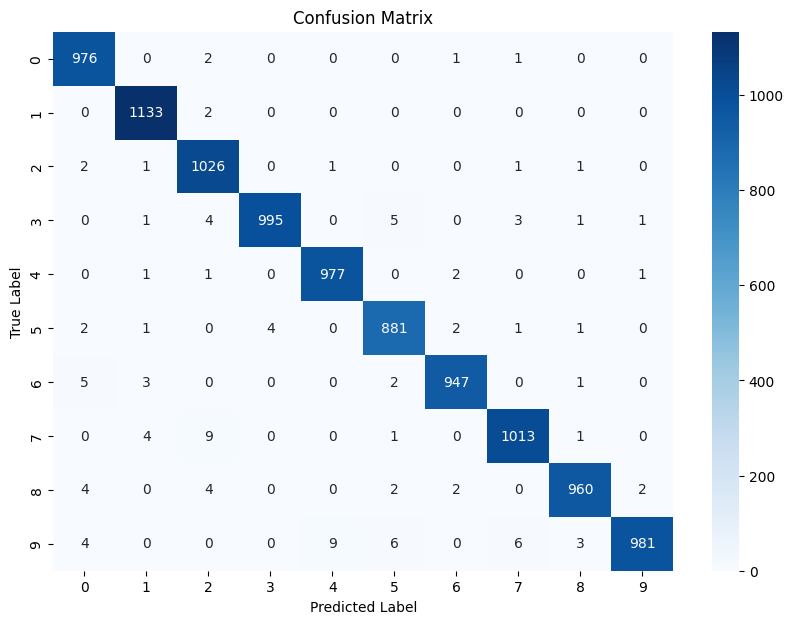

In [12]:
# Get predictions for test set
y_pred = ig_14_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# **Step 2: Creating a Custom Dataset with Numbers (0-9) in Different Fonts**

Now that we have trained our CNN model on MNIST, we need to create a dataset containing numbers 1-10 in different fonts.



In [13]:
pip install pillow opencv-python numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 19.6 MB/s eta 0:00:00


## **Step 2.1: Connecting to the drive**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import os
if os.path.exists("/content/drive/My Drive"):
    print(" Google Drive is already mounted!")
else:
    from google.colab import drive
    drive.mount('/content/drive')


 Google Drive is already mounted!


## **Step 2.2: Generating Images with Different Fonts**

We will be:

- Creating images with numbers 0-9.
- Using different 63 TrueType fonts (TTF).
- Saving these images in a folder for testing.


## **Step 2.3: Verifying the Generated Images**

To check the generated images, we can display:

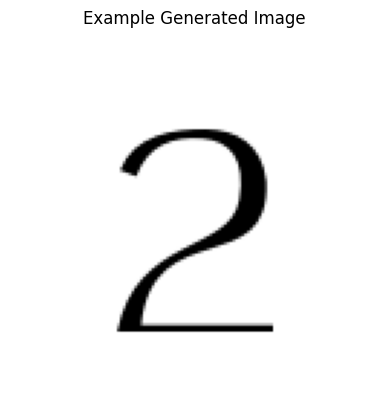

In [16]:
import os
import random
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

ig_14_output_dir = "/content/drive/MyDrive/custom_numbers"

# Show an example image
ig_14_example_image_path = os.path.join(ig_14_output_dir, "2_font12.png")  # Change filename to test different images
# Check if the file exists
if not os.path.exists(ig_14_example_image_path):
    print(f"Error: File not found: {ig_14_example_image_path}")
else:
    image = cv2.imread(ig_14_example_image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        plt.imshow(image, cmap="gray")
        plt.axis("off")
        plt.title("Example Generated Image")
        plt.show()
    else:
        print(f"Error: Could not load image from: {ig_14_example_image_path}")

In [17]:
import os
from PIL import Image

# Path where the generated images are stored
ig_14_image_dir = "/content/drive/My Drive/custom_numbers"

if os.path.exists(ig_14_image_dir):
    images = [f for f in os.listdir(ig_14_image_dir) if f.endswith('.png')]
    print(f"Found {len(images)} images in '{ig_14_image_dir}'")
else:
    print(f" Image directory NOT found! Check path: {ig_14_image_dir}")


Found 873 images in '/content/drive/My Drive/custom_numbers'


# **Step 3: Testing the CNN Model**
Now, we will:
- Load the trained CNN model (from Step 1).
- Load and preprocess the new images (resize, grayscale, normalize).
- Make predictions using the CNN model.
- Evaluate performance (accuracy, confusion matrix, etc.).



## **Step 3.1: Loading the Trained CNN Model**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define save path inside Drive
model_save_path = "/content/drive/My Drive/mnist_cnn_model.h5"

# Save the trained model
ig_14_model.save(model_save_path)

print(f" Model saved successfully at: {model_save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Model saved successfully at: /content/drive/My Drive/mnist_cnn_model.h5


In [19]:
import tensorflow as tf

# Load the trained model
ig_14_model_path = "/content/drive/My Drive/mnist_cnn_model.h5"  # Update path if needed
ig_14_model = tf.keras.models.load_model(ig_14_model_path)

print(" Model loaded successfully!")


 Model loaded successfully!


In [20]:
import numpy as np
import cv2
import os

# Directory where images are stored
ig_14_image_dir = "/content/drive/My Drive/custom_numbers"

# Image size (same as MNIST)
img_size = (28, 28)

# Load all images
images = []
labels = []  # Store the actual labels (1-10)

for file_name in os.listdir(ig_14_image_dir):
    if file_name.endswith(".png"):
        try:
            # Extract number label from filename
            if "_" in file_name:
                label = int(file_name.split("_")[0])  # Extract number before "_"
            else:
                label = int(file_name.split(".")[0])  # Extract number before ".png"

            # Load image
            img_path = os.path.join(ig_14_image_dir, file_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
            img = cv2.resize(img, img_size)  # Resize to match MNIST
            img = img / 255.0  # Normalize

            images.append(img)
            labels.append(label)

        except ValueError:
            print(f"Skipping file: {file_name} (Invalid format)")
            continue

# Convert to NumPy arrays
images = np.array(images).reshape(-1, 28, 28, 1)  # Add channel dimension
labels = np.array(labels)  # Convert to NumPy array

print(f"Loaded {len(images)} images for testing!")


Loaded 873 images for testing!


In [21]:
import numpy as np
import cv2
import os

# Directory where images are stored
ig_14_image_dir = "/content/drive/My Drive/custom_numbers"

# Image size (same as MNIST)
img_size = (28, 28)

# Load all images
images = []
labels = []

def extract_label(file_name):
    label_part = file_name.split("_")[0] if "_" in file_name else file_name.split(".")[0]
    if label_part.isdigit():
        return int(label_part) % 10  # Ensure labels are within 0-9
    return None  # Skip invalid files

for file_name in os.listdir(ig_14_image_dir):
    if file_name.endswith(".png"):
        try:
            # Extract label and ensure it's in range 0-9
            label = extract_label(file_name)
            if label is not None:
                # Load image
                img_path = os.path.join(ig_14_image_dir, file_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
                img = cv2.resize(img, img_size)  # Resize to match MNIST

                # **Improve Contrast** (Make digits more readable)
                img = cv2.GaussianBlur(img, (5, 5), 0)  # Blur to reduce noise
                _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # Binarize

                # Normalize (same as MNIST)
                img = img / 255.0

                images.append(img)
                labels.append(label)

        except ValueError:
            print(f" Skipping file: {file_name} (Invalid format)")
            continue

# Convert to NumPy arrays
images = np.array(images).reshape(-1, 28, 28, 1)  # Add channel dimension
labels = np.array(labels)

print(f" Loaded {len(images)} images for training!")
print(f" Unique labels in dataset: {np.unique(labels)}")  # Check labels are in range 0-9


 Loaded 873 images for training!
 Unique labels in dataset: [0 1 2 3 4 5 6 7 8 9]


In [29]:
# Split dataset into training and validation sets

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator class

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=5014)

# Data augmentation to improve training
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by ±10 degrees      #10
    width_shift_range=0.1,  # Shift image horizontally
    height_shift_range=0.1,  # Shift image vertically
    zoom_range=0.2,  # Zoom in/out by 10%                  #0.1
    shear_range=0.1  # Shear transformation
)

train_generator = datagen.flow(X_train, y_train, batch_size=64) #32
val_generator = datagen.flow(X_val, y_val, batch_size=64) #32

# Define CNN model
ig_14_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((3, 3)),          #2x2
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),          #2x2
    tf.keras.layers.Dropout(0.3),


    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
ig_14_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.007), # 0.001
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model using the generators
history = ig_14_model.fit(train_generator, epochs=44, validation_data=val_generator)


Epoch 1/44
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 882ms/step - accuracy: 0.0899 - loss: 3.0849 - val_accuracy: 0.1143 - val_loss: 3.4694
Epoch 2/44
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 793ms/step - accuracy: 0.1819 - loss: 2.7786 - val_accuracy: 0.1943 - val_loss: 2.4323
Epoch 3/44
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 869ms/step - accuracy: 0.1833 - loss: 2.5820 - val_accuracy: 0.1314 - val_loss: 2.5728
Epoch 4/44
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 851ms/step - accuracy: 0.2167 - loss: 2.3753 - val_accuracy: 0.1200 - val_loss: 3.8068
Epoch 5/44
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 853ms/step - accuracy: 0.2190 - loss: 2.2152 - val_accuracy: 0.0857 - val_loss: 4.8947
Epoch 6/44
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 871ms/step - accuracy: 0.2698 - loss: 2.0384 - val_accuracy: 0.1086 - val_loss: 8.0992
Epoch 7/44
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 801ms/step - accuracy: 0.3065 - loss: 1.9627 - val_accuracy: 0.1086 - val_loss: 11.1619
Epoch 8/44
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 860ms/step - accuracy: 0.3729 - loss: 1.8024 - val_accuracy:

## **Step 3.2: Knowing the Model's Accuracy**

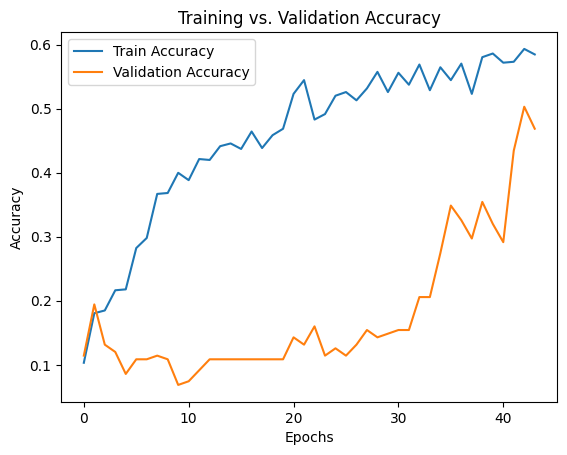

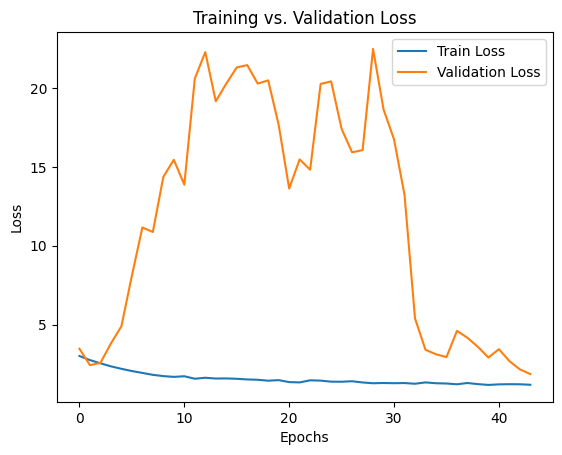

In [31]:
import matplotlib.pyplot as plt

# Plot Training vs. Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

# Plot Training vs. Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()


In [34]:
test_loss, test_acc = ig_14_model.evaluate(X_val, y_val)
print(f" Model Accuracy on Validation Set: {test_acc * 100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6356 - loss: 1.0705
 Model Accuracy on Validation Set: 62.86%


In [33]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Compute confusion matrix
# cm = confusion_matrix(labels, predicted_labels)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 11), yticklabels=range(1, 11))
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()


## **Step 3.3: Testing the Model 1.O**

Testing the model with image that being there in the training dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


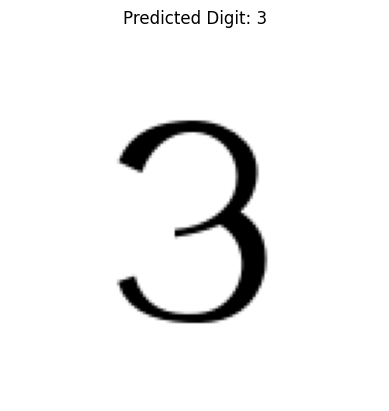

 The model predicts: 3


In [35]:
import tensorflow as tf
import numpy as np
import cv2
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt

#  Mount Google Drive
drive.mount('/content/drive')

#  Load the trained CNN model
ig_14_model_path = "/content/drive/My Drive/mnist_cnn_model.h5"  # Update path if needed
ig_14_model = tf.keras.models.load_model(ig_14_model_path)
print("Model loaded successfully!")

# Preprocessing Function for Image
def preprocess_image(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize to 28x28 (same as MNIST dataset)
    img = cv2.resize(img, (28, 28))

    # Invert colors if needed (MNIST has white digits on black background)
    img = 255 - img

    # Normalize pixel values (0 to 1 range)
    img = img / 255.0

    # Reshape for model input: (batch_size, height, width, channels)
    img = img.reshape(1, 28, 28, 1)

    return img

#  Test with Custom Image
ig_14_image_path = "/content/drive/My Drive/custom_numbers/3_font12.png"  # Update path
test_image = preprocess_image(ig_14_image_path)

#  Predict the digit
prediction = ig_14_model.predict(test_image)
predicted_digit = np.argmax(prediction)

#  Display Results
plt.imshow(cv2.imread(ig_14_image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis("off")
plt.show()

print(f" The model predicts: {predicted_digit}")


## **Step: 3.4: Testing the Model 2.O**

Testing the model with image that being uploaded thorugh local folder and never seen by the model


Saving test 2 (2).png to test 2 (2).png
Image uploaded: test 2 (2).png
 Model loaded successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


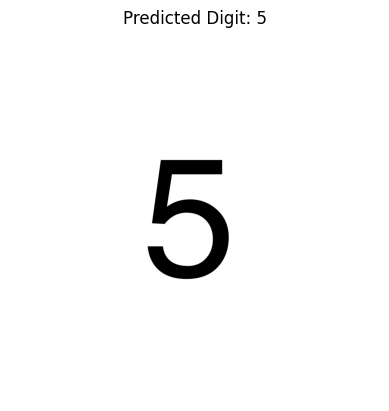

 The model predicts: 5


In [37]:
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

#  Upload Image from System
uploaded = files.upload()

# Get the uploaded file name
ig_14_image_path = list(uploaded.keys())[0]
print(f"Image uploaded: {ig_14_image_path}")

#  Load the trained CNN model
ig_14_model_path = "/content/drive/My Drive/mnist_cnn_model.h5"  # Update with your model path
ig_14_model = tf.keras.models.load_model(ig_14_model_path)
print(" Model loaded successfully!")

# Preprocessing Function for Image
def preprocess_image(image_path):
    # Load image in grayscale
    # Corrected line: Read the image using the provided image_path
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize to 28x28 (same as MNIST dataset)
    img = cv2.resize(img, (28, 28))

    # Invert colors if needed (MNIST has white digits on black background)
    img = 255 - img

    # Normalize pixel values (0 to 1 range)
    img = img / 255.0

    # Reshape for model input: (batch_size, height, width, channels)
    img = img.reshape(1, 28, 28, 1)

    return img

#  Preprocess the Uploaded Image
test_image = preprocess_image(ig_14_image_path)

#  Predict the digit
# Corrected line: Use the loaded model (ig_14_model) for prediction
prediction = ig_14_model.predict(test_image)
predicted_digit = np.argmax(prediction)

#  Display Results
# Corrected line: Use ig_14_image_path to read the image for display
plt.imshow(cv2.imread(ig_14_image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis("off")
plt.show()

print(f" The model predicts: {predicted_digit}")